# Titanic Data Deeper Look

Whats the probability of suriving the titanic if you were put on it?

## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.svm import SVC
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

## Data Pre-processing 
Reading in data

In [2]:
df = pd.read_csv("train.csv", skipinitialspace=True)

## Data Exploration

Visualizing data of Titanic and making assertions

In [3]:
df.groupby("Pclass").mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


First class had a higher chance of surviving.

In [4]:
%matplotlib inline

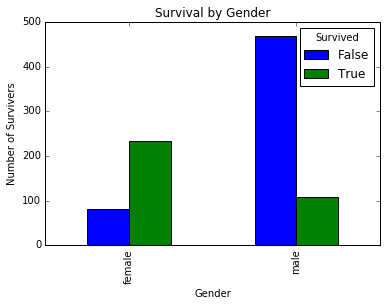

In [5]:
#Histogram of survival by gender

# #finds where all elements in geneder column equals female
# women_only_stats = df[0::,4] == "female"
# men_only_stats = df[0::,4] != "female"

# #select data of women and men who survived 0-dead 1-alive
# women_onboard = df[women_only_stats,1].astype(np.float)
# men_onboard = df[men_only_stats,1].astype(np.float)

pd.crosstab(df.Sex, df.Survived.astype(bool)).plot(kind='bar')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Survivers")

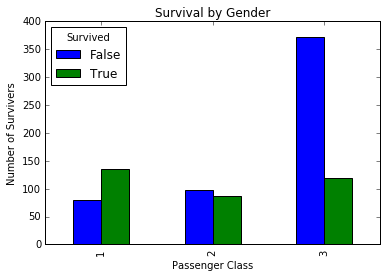

In [6]:
pd.crosstab(df.Pclass, df.Survived.astype(bool)).plot(kind='bar')
plt.title("Survival by Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Survivers")

## Training a Logistical Regression

In [10]:
# X = df.ix[:,1:3].copy()
# y = df[:, 0].astype(np.float)

# create dataframes with an intercept column
y, X = dmatrices('Survived ~ Pclass + Age + Fare', df, return_type="dataframe")
# flatten y into a 1-D array
y = np.ravel(y)

print(X.columns)

Index(['Intercept', 'Pclass', 'Age', 'Fare'], dtype='object')


### Running logistical regression on entire data set

In [11]:
# instantiate a logistic regression model, and fit with X and y

model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.70728291316526615

In [12]:
# what percentage survived?
y.mean()

0.4061624649859944

Only 40% of the people survived, which means that you could obtain 70% accuracy by always predicting "no". So we're doing better than the null error rate, but not by much.

# Validate with K-fold

This helps verify the effectiveness of the algorithm. The data will be split into 10 buckets and the algorithm will run each bucket using a different bucket for each test set.